# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Simulation

In [55]:
# number of trials
N_trials = int( 1e4 )

# list for collecting sum of two dice
seq_lengths = [ ]


# loop for realizations
for _n in range( N_trials ):
    
    # throw dice
    # break if 6 is sampled
    
    # index of current observation
    observation_index = 1
    
    # loop until result equals 6
    while True:
        
        sample = np.random.choice( np.arange(1, 7) )
        if sample == 6:
            break
            
        # increase counter
        observation_index += 1
        
    # save length of required sequence
    seq_lengths.append( observation_index )
    

## Determine probability and plot

In [56]:
# possible lengths (cut to 30)
lengths = np.arange( 1, 51 )

# theoretical values
p = 1/6
Pr_theo = (1-p)**(lengths-1) * p

# simulation results
Pr_sim = np.zeros_like( Pr_theo )
    
# loop for possible sums and get relative frequency
for ind_length, val_length in enumerate( lengths ):

    Pr_sim [ ind_length ] = np.sum( [ int( l == val_length ) for l in seq_lengths ] ) / N_trials

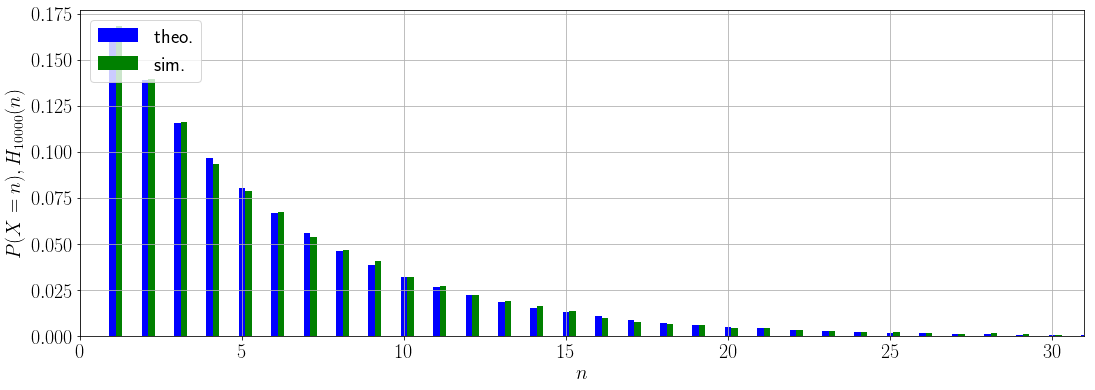

In [58]:
# plotting
plt.figure()    

width = 0.2
plt.bar( lengths, Pr_theo, linewidth=2.0, width=width, color='b', label='theo.')
plt.bar( lengths+width, Pr_sim, linewidth=2.0, color='g', width=width, label='sim.')

plt.xlabel('$n$')
plt.ylabel('$P(X=n), H_{{{}}}(n)$'.format( int(N_trials) ) )
plt.grid( True )
plt.xlim( 0, 31)
plt.legend( loc = 'upper left' )

## Get cdf and plot

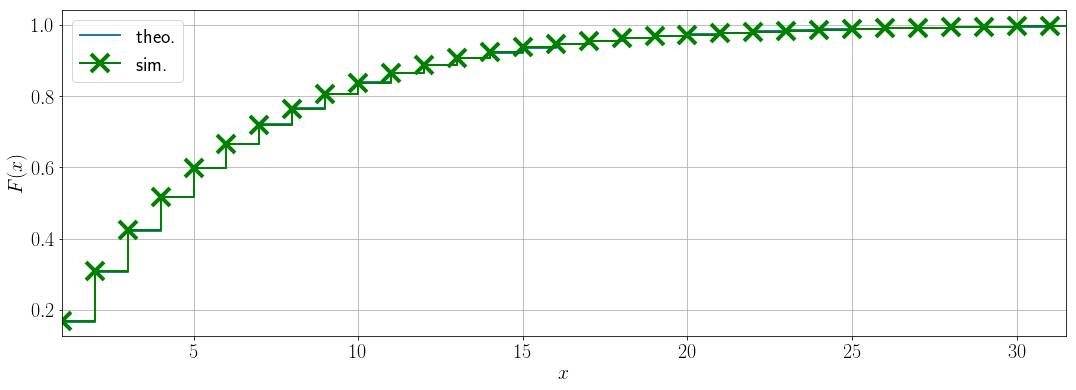

In [59]:
# cdf
F_theo = np.cumsum( Pr_theo )         
F_sim = np.cumsum( Pr_sim )

# plotting
plt.figure()

plt.step( lengths , F_theo, linewidth=2.0, label='theo.', where='post')
plt.step( lengths , F_sim, '-xg', mew=4, ms=18, linewidth=2.0, label='sim.', where='post')    

plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.xlim( (1,31.5) )
plt.grid( True )
plt.legend( loc = 'upper left' )